### 📊 Urgency Sentiment Analysis in Job Postings

In this notebook, we analyze the **urgency tone** in job descriptions to detect patterns that may help distinguish between:

- ✅ Real human-written jobs  
- 🚫 Fake human-written scam jobs  
- 🤖 Fake AI-refined scam jobs

This task is part of a **sentiment analysis** approach.  
The goal is to explore whether **scam job postings** (especially those generated by AI) tend to sound **more urgent, persuasive, or emotionally charged** compared to authentic job descriptions.


## 📥 Step 1: Load and Prepare the Datasets

We load the three datasets (real, fake-human, fake-AI) and label them to track their origin. We also make sure they share a consistent structure so they can be concatenated into one DataFrame.

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load real job postings
real_df = pd.read_csv("../1_datasets/cleaned_real_jobs/cleaned_real_jobs.csv")

# Load human-written fake job postings
fake_human_df = pd.read_csv(
    "../1_datasets/cleaned_aegean_fakejobs/aegean_500_fakejobs.csv"
)

# Load AI-generated fake job postings
fake_ai_df = pd.read_csv(
    "../1_datasets/fakejobs_refined/batch_84_Justina_refined.csv"
)  # noqa: E501

### 🧹 Data Cleaning and Preparation

- Standardized column names by renaming description-related columns to `description`.
- Removed duplicate `description` column from the AI-generated dataset (`fake_ai_df`).
- Added a `type` column to indicate the job post source:
  - `real` → Real job postings
  - `fake_human` → Human-written fake postings
  - `fake_ai` → AI-generated fake postings
- Selected only the relevant columns: `description` and `type`.


In [37]:
# Rename columns for consistency
real_df.rename(columns={"Full Job Description": "description"}, inplace=True)
fake_human_df.rename(columns={"description": "description"}, inplace=True)
fake_ai_df.rename(columns={"refined_description": "description"}, inplace=True)

# Drop duplicate 'description' column if exists in fake_ai_df
fake_ai_df = fake_ai_df.loc[:, ~fake_ai_df.columns.duplicated()]

# Add type labels
real_df["type"] = "real"
fake_human_df["type"] = "fake_human"
fake_ai_df["type"] = "fake_ai"

# Keep only necessary columns
real_df = real_df[["description", "type"]]
fake_human_df = fake_human_df[["description", "type"]]
fake_ai_df = fake_ai_df[["description", "type"]]

## 🧩 Step 3: Tokenization

We split each job description into individual tokens (words). This prepares the text for further NLP tasks like POS tagging or topic modeling.


In [ ]:
# Combine the three datasets into one DataFrame
combined_df = pd.concat(
    [real_df, fake_human_df, fake_ai_df], ignore_index=True
)  # noqa: E501

## ⚡ Step 4: Sentiment Analysis – Measuring Urgency

Using the TextBlob library, we calculate sentiment polarity for each job description. This gives us a rough indicator of whether the tone is positive, neutral, or negative.

This is a **proxy** for measuring urgency — posts that sound highly persuasive or emotionally loaded tend to score higher on polarity.

In [44]:
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity


# Apply sentiment analysis on the 'description' column
combined_df["sentiment_polarity"] = combined_df["description"].apply(
    get_sentiment
)  # noqa: E501

## 📊 Step 5: Visualize Sentiment by Job Type

We compare the sentiment polarity scores between the three job types to see if fake/AI-written posts show more urgency or emotional appeal.

Boxplots or histograms can highlight if AI-generated scams are more emotionally persuasive than real job posts.


C:\Users\User\AppData\Local\Temp\ipykernel_4360\3788392151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x="type", y="sentiment_polarity", palette="Set2")


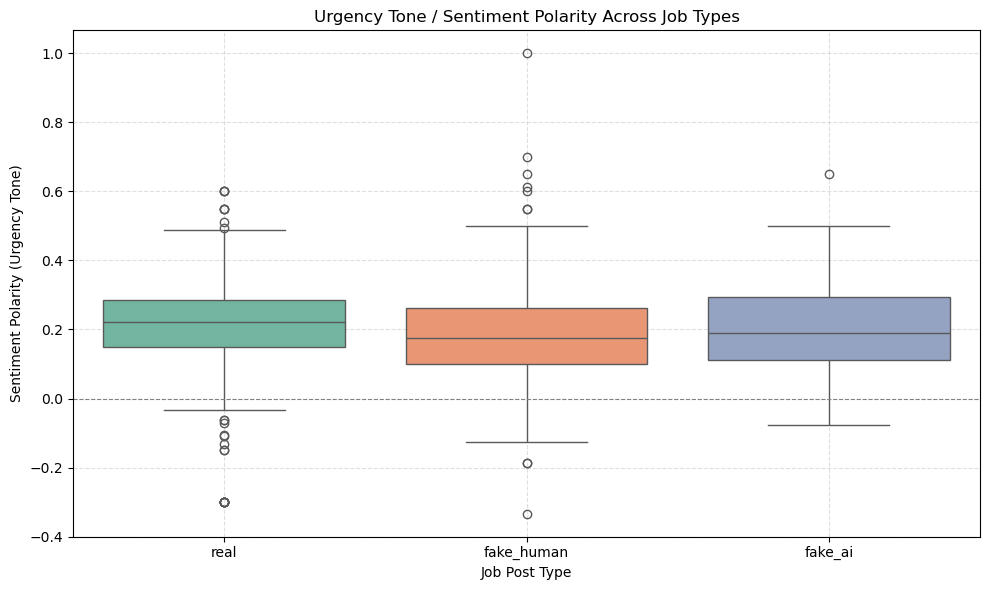

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x="type", y="sentiment_polarity", palette="Set2")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.title("Urgency Tone / Sentiment Polarity Across Job Types")
plt.xlabel("Job Post Type")
plt.ylabel("Sentiment Polarity (Urgency Tone)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig("../4_data_analysis/urgency_tone.png")
plt.show()

## 🧠 Step 6: Interpretation

From the plots, we observe trends in the urgency tone between different job types. These insights will contribute to our final research question:

> Can humans distinguish between real and fake job ads based on how "urgent" or "emotional" the text sounds?

We also acknowledge that this method is not perfect — urgency is not the same as positive/negative emotion. But it offers a useful approximation.

In [41]:
combined_df.groupby("type")["sentiment_polarity"].mean()

type
fake_ai       0.202369
fake_human    0.186124
real          0.213596
Name: sentiment_polarity, dtype: float64